Preprocessing Data - Tugas Kecerdasan Buatan


In [3]:
%pip install pandas numpy matplotlib seaborn

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.5 MB 7.0 MB/s eta 0:00:02
   ---------- ----------------------------- 3.1/11.5 MB 7.7 MB/s eta 0:00:02
   ---------------- ----------------------- 4.7/11.5 MB 7.3 MB/s eta 0:00:01
   --------------------- ------------------ 6.3/11.5 MB 7.3 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.5 MB 7.9 MB/s eta 0:00:01
   ------------------------------------ --- 10.5/11.5 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/12.6 MB 8.4 MB/s eta 0:00:02
   ---------- ----------------------------- 3.4/12.6 MB 8.4 MB/s eta 0:00:02
   ---------------- ----------------------- 5.2/12.6 MB 8.6 MB/s eta 0:00:01
   -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Shape before removing duplicates: (5110, 12)
Shape after removing duplicates: (5110, 12)
Shape after removing outliers: (4253, 12)

Missing values before handling:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Missing values after handling:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Columns removed due to single unique value: []
Columns removed as non-representative: ['id']

Final dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 4253 entries, 2 to 5109
Data columns (total 11 columns):
 #   Colu

C:\Users\Asus\AppData\Local\Temp\ipykernel_28320\939114188.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


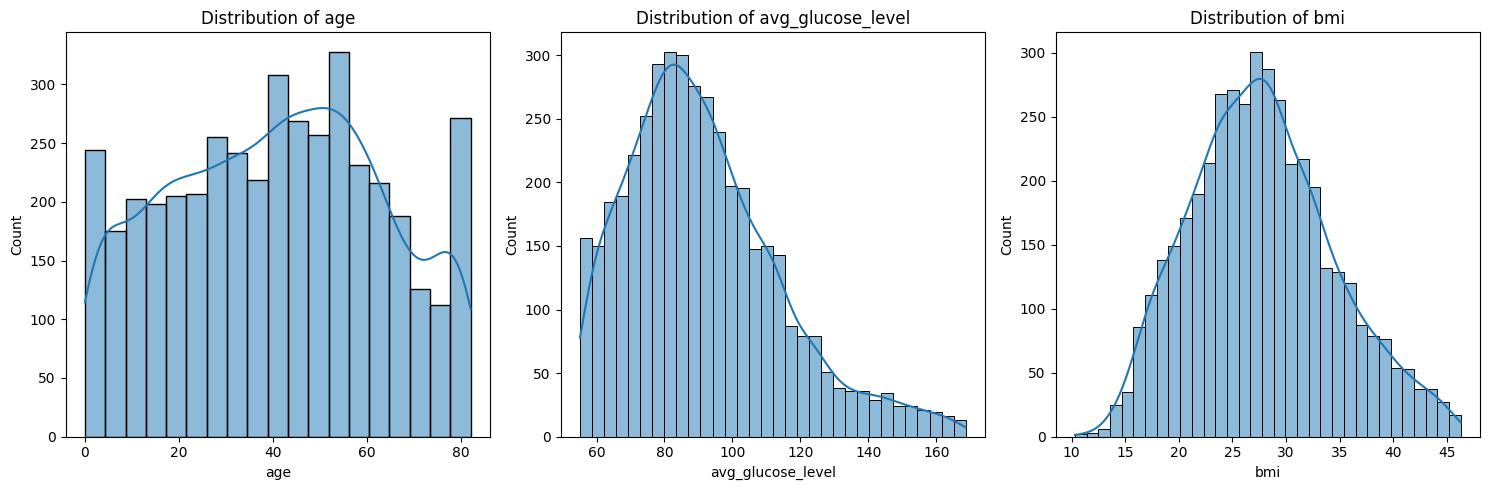

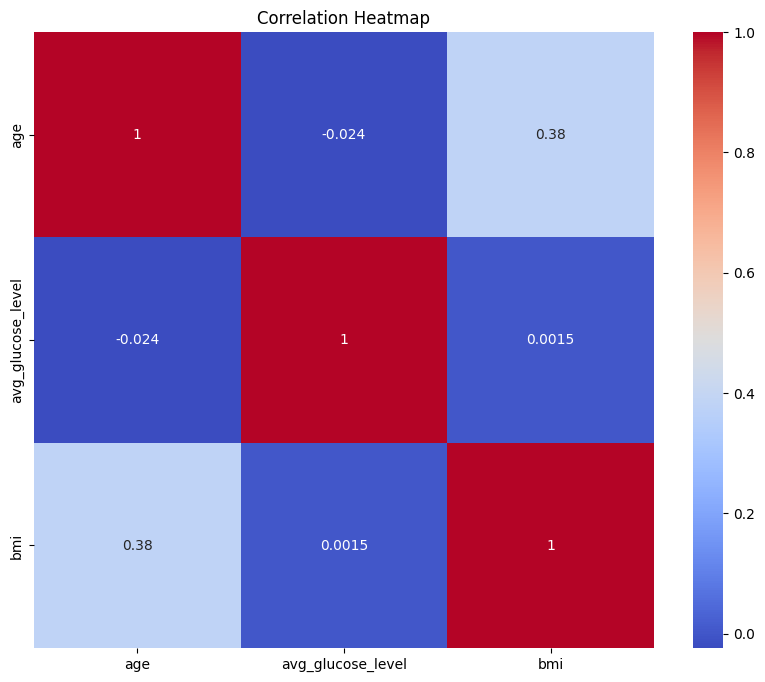


Cleaned dataset saved as 'cleaned_healthcare_dataset.csv'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# 1. Identify and remove duplicate data
print("Shape before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

# 2. Identify and remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_columns = ['age', 'avg_glucose_level', 'bmi']
for col in numerical_columns:
    df = remove_outliers(df, col)

print("Shape after removing outliers:", df.shape)

# 3. Identify and handle missing values
print("\nMissing values before handling:")
print(df.isnull().sum())

# Replace 'N/A' with NaN
df = df.replace('N/A', np.nan)

# Handle missing values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

# 4. Remove columns with only one unique value
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=single_value_columns, inplace=True)
print("\nColumns removed due to single unique value:", single_value_columns)

# 5. Remove non-representative columns
non_representative_columns = ['id']  # Add any other columns you consider non-representative
df.drop(columns=non_representative_columns, inplace=True)
print("Columns removed as non-representative:", non_representative_columns)

# Display final dataset info
print("\nFinal dataset info:")
print(df.info())

# Visualize the distribution of numerical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Visualize the correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Save the cleaned dataset
df.to_csv('cleaned_healthcare_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_healthcare_dataset.csv'")
